<a href="https://colab.research.google.com/github/Raghad-Aldakhil/Flutter-Pet-Clinic/blob/master/Brian_tumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor Classification**

---

In this project, Support Vector Machines (SVM) are used to train a model to classify if an image contains a a brain tumot or not. The feature representation method Histogram of Oriented Gradients (HOG) and Histogram are used as the feature representation. 



---



libraries we need for this project

---




 

*   **os**: just for file and directory operations.
*   **cv2**: provides a wide range of functions and algorithms for image and video processing: feature extraction, object detection, and more.
*  **Numpy**: for data analysis, and machine learning applications. 
*   **Pyplot**: to generate line plots, bar plots, scatter plots, histograms, and more
*   **SVC**: provides functions for training and predicting with SVM-based classifiers
*   **train_test_split**: used for splitting a dataset into training and testing subsets
* **accuracy_score**: calculates the accuracy of classification models by comparing the predicted labels with the true labels
* **confusin_matrix**: generates a confusion matrix, which is a table that presents the performance of a classification model by visualizing the predicted and true labels for each class.

* **matplotlib**: rovides a high-level interface for creating and customizing plots and visualizations. 
* **hog**: for object detection and recognition. It captures shape and texture information by analyzing local gradients in an image.
* **seaborn**:  for data analysis and presentation.
* **pandas**: DataFrame object, which is a two-dimensional table-like data structure. It allows you to load, manipulate, and analyze structured data, such as CSV files,  It allows you to load data from external sources, perform data transformations, and save the results back to different file formats.



 












In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive



> upload the datdset 



In [ ]:
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
os.listdir('/content/drive/MyDrive/brain_tumor1_dataset')

['no', 'yes']

this section contains the file directories of the images with brain tumor and without brain tumor

In [ ]:
yes=os.listdir('/content/drive/MyDrive/brain_tumor1_dataset/yes')
no=os.listdir('/content/drive/MyDrive/brain_tumor1_dataset/no')

In [ ]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [ ]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))



> lists the files present in specific directories using os.listdir() and assigns the file names to yes_values and no_values. These directory paths to brain tumor images.



In [ ]:
yes_values=os.listdir('/content/drive/MyDrive/brain_tumor1_dataset/yes')
no_values=os.listdir('/content/drive/MyDrive/brain_tumor1_dataset/no')



Creating target labels for the data, initializes :


> **target_x** as an array of ones with the length equal to (1) of files in the 'yes' directory (indicating brain tumor)



> **target_y** as an array of (0) with the length equal to the number of files in the 'no' directory (indicating no brain tumor).  


> **data_target** target_x and target_y combined using np.concatenate(), which represents the target labels for the classification task. then, verifies whether the length of data_target is equal to the sum of the lengths of target_x and target_y. to ensure that the target labels have been created correctly.









In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [ ]:
# len(data_target)==len(data)

True

In [ ]:
# len(X_data)==len(data)==len(data_target)

True

In [ ]:
# X_data

### **HOG Features (Histogram of Oriented Gradients)** 



---

HOG, is a feature descriptor used in computer vision and image processing. It is commonly employed for object detection and recognition tasks. The HOG feature descriptor captures the shape and texture information of an object or region in an image.

The feature extraction technique involves the following steps:


1.   Image Preprocessing: The input image is first preprocessed to enhance contrast and reduce noise. This can include operations like grayscale conversion, normalization, and local image normalization.
2.   Gradient Computation: Gradients are computed for the image to capture the local intensity variations. Typically, the gradients are calculated using differential filters like Sobel or Scharr operators.
3. Orientation Binning: The image is divided into small cells, and for each cell, the gradient orientations are binned into a set of predefined directions (e.g., 0° to 180°). This step helps capture the dominant orientation of gradients within each cell.
4. Histogram Calculation: Within each cell, a histogram of gradient orientations is constructed based on the orientations and magnitudes of the gradients. The histogram bins accumulate the gradient magnitudes based on the corresponding orientation.
5. Block Normalization: The image is further divided into blocks, which consist of multiple cells. The histograms within each block are concatenated, and a normalization step is applied to each block. This normalization helps to reduce the influence of lighting variations and enhances the robustness of the descriptor.
6. Descriptor Formation: Finally, the normalized histogram values from all the blocks are concatenated to form the HOG feature descriptor. The resulting descriptor provides a compact representation of the shape and texture information of the object or region of interest.





The HOG feature descriptor is often used in conjunction with machine learning algorithms such as support vector machines (SVM) or neural networks for object detection and recognition tasks. It has been successfully applied in various applications, including pedestrian detection, face recognition, and vehicle detection.

In [ ]:
from scipy import misc
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/brain_tumor1_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)



> **X_data**: initializes an empty list to store the processed image data.

> Looping through yes_values (images with brain tumor): For each file name in yes_values, it reads the corresponding image using cv2.imread()

> then, the image is resized to a fixed size of 32x32 pixels using cv2.resize() 

> The image channels (BGR) are split using cv2.split(), resulting in separate arrays for each channel.

> The channels are then merged back together in RGB order using cv2.merge() to convert the image to RGB format.

> then, The processed image is appended to the **X_data** list








In [ ]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/brain_tumor1_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

> Looping through no_values (images without brain tumor):

> Similar to the previous loop, it reads, resizes, splits, and merges each image.

> The processed image is also appended to the X_data list.

In [ ]:
len(X_data)==len(data)==len(data_target)

True

> checks whether the length of X_data is equal to the lengths of data and data_target.to ensure that the data has been processed and populated correctly.



---





>  **ppc** variable, representing the number of pixels per cell for the HOG calculation. This parameter controls the granularity of the HOG features

> initializes two empty lists, **hog_features** and **hog_images**, which will be used to store the computed HOG features and the corresponding HOG visualization images.

> Looping through images in X_data:
 >> For each image, it checks the shape of the image using img.shape.

 >> If the image has three channels (RGB image), it converts the image to grayscale using cv2.cvtColor() with the cv2.COLOR_RGB2GRAY flag.

 >> then calculates the HOG features and visualizes the HOG image using the hog() function from skimage.feature. The HOG parameters such as orientations, pixels_per_cell, cells_per_block, and block_norm are provided.

 >> The computed HOG features (fd) and the corresponding HOG image (hog_image) are appended to the hog_features and hog_images lists, respectively.

> After the loop, the code prints the shape of each set of HOG features in the hog_features list. This is done using a loop and enumerate() to access the index and features



In [ ]:
from skimage.feature import hog

ppc = 8  # pixels per cell

hog_features = []
hog_images = []
for img in X_data:
    if len(img.shape) == 3:  # Color image (RGB)
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Calculate the HOG features and visualize the HOG image
        fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(ppc, ppc),
                            cells_per_block=(4, 4), block_norm='L2', visualize=True,
                            multichannel=False, channel_axis=-1)

    elif len(img.shape) == 2:  # Grayscale image
        # Calculate the HOG features and visualize the HOG image
        fd, hog_image = hog(img, orientations=8, pixels_per_cell=(ppc, ppc),
                            cells_per_block=(4, 4), block_norm='L2', visualize=True,
                            multichannel=False, channel_axis=-1)

    else:  # Other types of images (e.g., multi-spectral)
        raise ValueError('Unsupported image shape:', img.shape)

    # Append the HOG features and image to the lists
    hog_features.append(fd)
    hog_images.append(hog_image)

# Verify the shape of the HOG features
for i, features in enumerate(hog_features):
    print(f"Image {i+1} HOG features shape:", features.shape)

<ipython-input-19-c32e6946abf8>:13: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(ppc, ppc),


Image 1 HOG features shape: (128,)
Image 2 HOG features shape: (128,)
Image 3 HOG features shape: (128,)
Image 4 HOG features shape: (128,)
Image 5 HOG features shape: (128,)
Image 6 HOG features shape: (128,)
Image 7 HOG features shape: (128,)
Image 8 HOG features shape: (128,)
Image 9 HOG features shape: (128,)
Image 10 HOG features shape: (128,)
Image 11 HOG features shape: (128,)
Image 12 HOG features shape: (128,)
Image 13 HOG features shape: (128,)
Image 14 HOG features shape: (128,)
Image 15 HOG features shape: (128,)
Image 16 HOG features shape: (128,)
Image 17 HOG features shape: (128,)
Image 18 HOG features shape: (128,)
Image 19 HOG features shape: (128,)
Image 20 HOG features shape: (128,)
Image 21 HOG features shape: (128,)
Image 22 HOG features shape: (128,)
Image 23 HOG features shape: (128,)
Image 24 HOG features shape: (128,)
Image 25 HOG features shape: (128,)
Image 26 HOG features shape: (128,)
Image 27 HOG features shape: (128,)
Image 28 HOG features shape: (128,)
I



> **plt.imshow()**: This function is used to display an image in a plot. It takes the image data as input and displays it as an image.

> **hog_images[51]**: It accesses the 52nd element (index 51) in the hog_images list. hog_images list contains HOG visualization images corresponding to each image in X_data, this code displays the HOG image associated with the 52nd image in the list



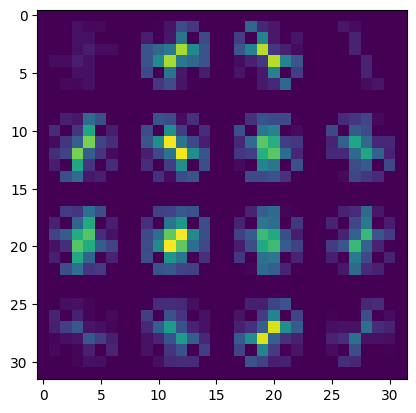

In [ ]:
plt.imshow(hog_images[51])

In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True



> **target_x** = np.full(len(yes), 1): This line creates a NumPy array target_x filled with the value (1), with a length equal to the number of elements in the 'yes' list. This is done using the np.full() function, which takes the length of yes as the first argument, the value 1 as the second argument, and creates an array of that length filled with 1.

> **target_y** = np.full(len(no), 0): same thing, but for 'no' list. 

> data_target = np.concatenate([target_x, target_y]): This line concatenates the target_x and target_y arrays using the np.concatenate() function. The resulting array data_target contains the target labels for the classification task, where 1 represents (brain tumor) and 0 represents (no brain tumor).

> len(data_target) == len(target_x) + len(target_y): This line checks to ensure that the length is equal.



In [ ]:
len(data_target)==len(data)

True

In [ ]:
len(X_data)==len(data)==len(data_target)

True

In [ ]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
hog_features.shape

(253, 128)

In [ ]:
data_target.shape

(253, 1)

In [ ]:
data_target = data_target.reshape(-1,1)



> this code segment below, performs the steps required to train an SVM classifier using the HOG features extracted from the images. It splits the data into training and testing sets, trains the SVM classifier on the training data, and evaluates its accuracy on the testing data.



In [ ]:
clf = svm.SVC() # for classification tasks using Support Vector Machines


hog_features = np.array(hog_features)
data_target = np.array(data_target)

# Reshape the features array to have an additional dimension along the second axis
hog_features = hog_features.reshape(hog_features.shape[0], -1)

# Concatenate the HOG features and target arrays horizontally
data_frame = np.hstack((hog_features, data_target))

# Shuffle the data_frame array
np.random.shuffle(data_frame)

# Split the data_frame array into training and testing arrays
train_data, test_data = train_test_split(data_frame, test_size=0.2, random_state=42)

# Split the training and testing arrays into input and target arrays
train_X, train_y = train_data[:, :-1], train_data[:, -1]
test_X, test_y = test_data[:, :-1], test_data[:, -1]

# Train the SVM classifier on the training data
clf.fit(train_X, train_y)

# Evaluate the SVM classifier on the testing data
accuracy = clf.score(test_X, test_y)
print("Accuracy:", accuracy)

Accuracy: 0.8235294117647058


In [ ]:
y_pred = clf.predict(test_X)



> After executing this code, the variable y_pred will contain the predicted class labels for the samples in the testing data based on the trained SVM classifier. These predictions can be further used for evaluation





> prints the accuracy score,and then the classification report, providing detailed evaluation metrics for each class in the classification task.



In [ ]:
print("Accuracy: "+str(accuracy_score(test_y, y_pred)))
print('\n')
print(classification_report(test_y, y_pred))

Accuracy: 0.8627450980392157


              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83        23
         1.0       0.82      0.96      0.89        28

    accuracy                           0.86        51
   macro avg       0.88      0.85      0.86        51
weighted avg       0.88      0.86      0.86        51





---





> **cm** = confusion_matrix(test_y, y_pred): calculates the confusion matrix by comparing the true labels (test_y) with the predicted labels (y_pred) using the confusion_matrix() function
>> The confusion matrix is a square matrix that represents the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

> **sns.heatmap(...)**: creates a heatmap visualization of the confusion matrix using the heatmap() function from the seaborn library. The heatmap() function takes several arguments to customize the appearance of the heatmap:

>> **cm**: The confusion matrix array.

>> **annot=True**: This parameter adds the numeric values of the confusion matrix to the heatmap cells.

>> **cmap="gray"**: This parameter sets the color map of the heatmap to "gray" to indicate different values.

>> **fmt="d"**: This parameter specifies the format of the values in the heatmap cells as integers.

>> **xticklabels=["Class 0", "Class 1"]**: This parameter sets the labels for the x-axis ticks of the heatmap.


>> **yticklabels=["Class 0", "Class 1"]**: This parameter sets the labels for the y-axis ticks of the heatmap.


<Axes: >

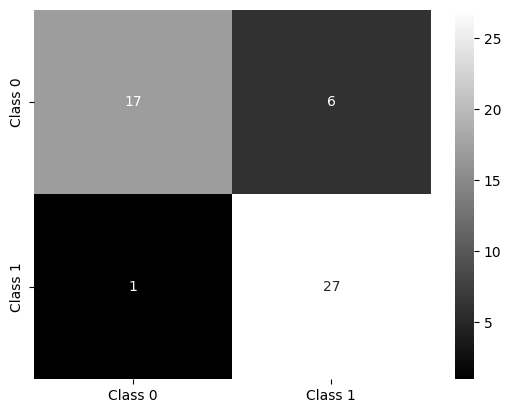

In [ ]:
import seaborn as sns
cm = confusion_matrix(test_y, y_pred)
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="gray", fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

The color intensity or shading in the heatmap cells represent the magnitude of the counts

## **Histogram features** 

---

In image processing, a histogram feature refers to the representation of an image based on its histogram. Instead of using the raw pixel values of an image, the histogram feature summarizes the distribution of pixel intensities in the image.

A histogram feature vector captures the frequency or occurrence of different intensity values in the image. Each bin in the histogram represents a range of intensity values, and the height or value of each bin corresponds to the number of pixels in the image that fall within that intensity range.

Histogram features are commonly used in various image analysis tasks, such as image classification, object recognition, and image retrieval. They provide a concise representation of an image's intensity distribution and can capture important characteristics or patterns that are relevant for specific tasks.

Here's a general outline of how histogram features are computed:
1. Convert the image to grayscale if it is not already in grayscale.
2. Divide the intensity range (e.g., 0-255) into a fixed number of bins or discrete intervals.
3. Count the number of pixels that fall into each intensity bin.
4. Normalize the histogram by dividing each bin count by the total number of pixels in the image (optional).
5. Represent the histogram as a feature vector. 

The resulting feature vector, often referred to as a histogram descriptor, can be used as input to various machine learning algorithms or compared to other image histograms for similarity or dissimilarity measurements.

Different variations and extensions of histogram features exist, such as color histograms for color images, multi-dimensional histograms to capture multiple image properties simultaneously (e.g., color and texture), and histogram-based techniques for local image descriptors like the Histogram of Oriented Gradients (HOG).

By analyzing and comparing histogram features, it becomes possible to quantify and identify differences or similarities between images, enabling various image processing and computer vision applications.

In [ ]:
from scipy import misc
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/brain_tumor1_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)



> **X_data**: initializes an empty list to store the processed image data.

> Looping through yes_values (images with brain tumor): For each file name in yes_values, it reads the corresponding image using cv2.imread()

> then, the image is resized to a fixed size of 32x32 pixels using cv2.resize() 

> The image channels (BGR) are split using cv2.split(), resulting in separate arrays for each channel.

> The channels are then merged back together in RGB order using cv2.merge() to convert the image to RGB format.

> then, The processed image is appended to the **X_data** list




In [ ]:
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('/content/drive/MyDrive/brain_tumor1_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

> Looping through no_values (images without brain tumor):

> Similar to the previous loop, it reads, resizes, splits, and merges each image.

> The processed image is also appended to the X_data list.

In [ ]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

Creating target labels for the data, initializes :


> **target_x** as an array of ones with the length equal to (1) of files in the 'yes' directory (indicating brain tumor)



> **target_y** as an array of (0) with the length equal to the number of files in the 'no' directory (indicating no brain tumor).  


> **data_target** target_x and target_y combined using np.concatenate(), which represents the target labels for the classification task. then, verifies whether the length of data_target is equal to the sum of the lengths of target_x and target_y. to ensure that the target labels have been created correctly.



In [ ]:
len(X_data)==len(data)==len(data_target)

> checks lenght

In [ ]:
len(X_data)==len(data)==len(data_target)

 > this section calculates the histogram features for the images in X_data, It normalizes the histograms and stores the resulting features in the hist_features list.

In [ ]:
hist_features = []
for img in X_data:
    if len(img.shape) == 3:  # Color image (RGB)
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Calculate the histogram of the grayscale image
        hist, _ = np.histogram(gray.ravel(), bins=256, range=(0, 255))

    elif len(img.shape) == 2:  # Grayscale image
        # Calculate the histogram of the grayscale image
        hist, _ = np.histogram(img.ravel(), bins=256, range=(0, 255))

    else:  # Other types of images (e.g., multi-spectral)
        raise ValueError('Unsupported image shape:', img.shape)

    # Normalize the histogram to sum to one
    hist = hist / np.sum(hist)

    # Append the histogram features to the list
    hist_features.append(hist)

# Verify the shape of the histogram features
for i, features in enumerate(hist_features):
    print(f"Image {i+1} histogram features shape:", features.shape)

Image 1 histogram features shape: (256,)
Image 2 histogram features shape: (256,)
Image 3 histogram features shape: (256,)
Image 4 histogram features shape: (256,)
Image 5 histogram features shape: (256,)
Image 6 histogram features shape: (256,)
Image 7 histogram features shape: (256,)
Image 8 histogram features shape: (256,)
Image 9 histogram features shape: (256,)
Image 10 histogram features shape: (256,)
Image 11 histogram features shape: (256,)
Image 12 histogram features shape: (256,)
Image 13 histogram features shape: (256,)
Image 14 histogram features shape: (256,)
Image 15 histogram features shape: (256,)
Image 16 histogram features shape: (256,)
Image 17 histogram features shape: (256,)
Image 18 histogram features shape: (256,)
Image 19 histogram features shape: (256,)
Image 20 histogram features shape: (256,)
Image 21 histogram features shape: (256,)
Image 22 histogram features shape: (256,)
Image 23 histogram features shape: (256,)
Image 24 histogram features shape: (256,)
I



---



> **plt.hist(X_data[0].ravel(), bins=256, range=(0, 255))**: Creates a histogram using plt.hist() from the matplotlib.pyplot library. It takes the flattened version of the first image (X_data[0].ravel()) as input and specifies the number of bins (256) and the value range (0 to 255) for the histogram.

> **plt.title('Histogram of Image 1')**: Sets the title of the plot as "Histogram of Image 1".

> **plt.xlabel('Pixel Intensity')*: Sets the label for the x-axis as "Pixel Intensity".

> **plt.ylabel('Frequency')*: Sets the label for the y-axis as "Frequency".

> **plt.show()** : Displays the histogram plot.

 this section, visualizes the histogram of the first image in X_data using a histogram plot. 

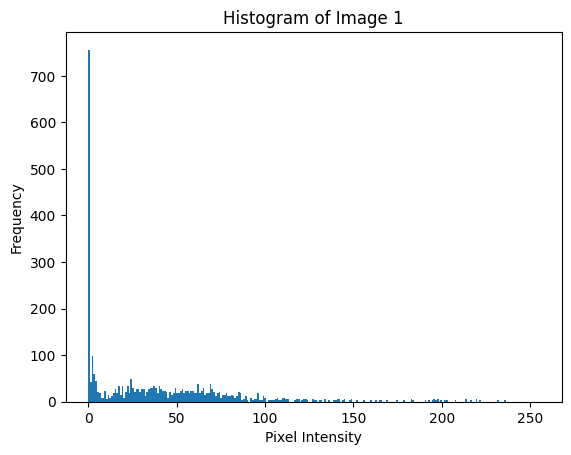

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of the first image
plt.hist(X_data[0].ravel(), bins=256, range=(0, 255))
plt.title('Histogram of Image 1')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

> **data_target = data_target.reshape(-1,1)** reshapes the data_target array by adding an additional dimension along the second axis, effectively converting it from a 1D array to a 2D column vector. 

> The reshape() function is used with the parameter -1 to automatically determine the size of the reshaped dimension based on the length of the array.

In [ ]:
data_target = data_target.reshape(-1,1)

> **hist_features.shape** : return the shape of the hist_features

In [ ]:
hist_features.shape

(253, 256)

In [ ]:
clf = svm.SVC() # for classification tasks using Support Vector Machines


hist_features = np.array(hist_features)
data_target = np.array(data_target)


hist_features = hist_features.reshape(hist_features.shape[0], -1)

# Concatenate the features and target arrays horizontally
data_frame = np.hstack((hist_features, data_target))

# Shuffle the data_frame array
np.random.shuffle(data_frame)

# Split the data_frame array into training and testing arrays
train_data, test_data = train_test_split(data_frame, test_size=0.2, random_state=42)


train_X, train_y = train_data[:, :-1], train_data[:, -1]
test_X, test_y = test_data[:, :-1], test_data[:, -1]

# Train the SVM classifier on the training data
clf.fit(train_X, train_y)

# Evaluate the SVM classifier on the testing data
accuracy = clf.score(test_X, test_y)
print("Accuracy:", accuracy)

Accuracy: 0.8235294117647058


> **hist_features = np.array(hist_features)**: Converts the hist_features list (which contains the histogram features of the images) into a NumPy array for easier manipulation and compatibility with the SVM model.

> **data_target = np.array(data_target)**: Converts the data_target list (which contains the target labels for the images) into a NumPy array.

> **hist_features = hist_features.reshape(hist_features.shape[0], -1)**: Reshapes the hist_features array by adding an additional dimension along the second axis. This step is done to ensure that the feature array has the correct shape for concatenation with the target array. The reshaping is done based on the number of images (hist_features.shape[0]) and by specifying -1 for the second dimension, allowing NumPy to automatically determine the size based on the length of the array.

> ...


> **train_data, test_data = train_test_split(data_frame, test_size=0.2, random_state=42)** : Splits the data_frame array into training and testing datasets using the train_test_split() function. The testing dataset will be 20% of the total data, and a random state of 42 is set for reproducibility.

> **train_X, train_y = train_data[:, :-1], train_data[:, -1]**: Splits the training data into input features (train_X) and target values (train_y) by slicing the columns of the train_data array. The [:, :-1] indexing selects all columns except the last one, which corresponds to the target values. The [:, -1] indexing selects only the last column, which contains the target values.

> **test_X, test_y = test_data[:, :-1], test_data[:, -1]**: Splits the testing data into input features (test_X) and target values (test_y) using a similar slicing operation as in the previous step.


this code, trains an SVM classifier using histogram features extracted from images. It then evaluates the classifier's accuracy on a separate set of testing images.

In [ ]:
y_pred = clf.predict(test_X)

> **y_pred** : predicts the target labels for the testing data (test_X) using the trained SVM classifier (clf).

This code evaluates the performance of the SVM classifier by calculating the accuracy score and generating a classification report that includes metrics such as precision, recall, F1-score, and support for each class in the testing data.

In [ ]:
print("Accuracy: "+str(accuracy_score(test_y, y_pred)))
print('\n')
print(classification_report(test_y, y_pred))

Accuracy: 0.8235294117647058


              precision    recall  f1-score   support

         0.0       0.82      0.56      0.67        16
         1.0       0.82      0.94      0.88        35

    accuracy                           0.82        51
   macro avg       0.82      0.75      0.77        51
weighted avg       0.82      0.82      0.81        51



In [ ]:
import seaborn as sns
cm = confusion_matrix(test_y, y_pred)
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="gray", fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

> **cm** = confusion_matrix(test_y, y_pred): calculates the confusion matrix by comparing the true labels (test_y) with the predicted labels (y_pred) using the confusion_matrix() function
>> The confusion matrix is a square matrix that represents the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

> **sns.heatmap(...)**: creates a heatmap visualization of the confusion matrix using the heatmap() function from the seaborn library. The heatmap() function takes several arguments to customize the appearance of the heatmap:

>> **cm**: The confusion matrix array.

>> **annot=True**: This parameter adds the numeric values of the confusion matrix to the heatmap cells.

>> **cmap="gray"**: This parameter sets the color map of the heatmap to "gray" to indicate different values.

>> **fmt="d"**: This parameter specifies the format of the values in the heatmap cells as integers.

>> **xticklabels=["Class 0", "Class 1"]**: This parameter sets the labels for the x-axis ticks of the heatmap.


>> **yticklabels=["Class 0", "Class 1"]**: This parameter sets the labels for the y-axis ticks of the heatmap.

## Combine HOG and Histogram features 

---



In [ ]:
import pandas as pd
X_train1= pd.DataFrame(hist_features)

> **X_train1** : creates a pandas DataFrame object X_train1 from the hist_features data. hist_features is a list of lists representing a set of histogram features. Each row in X_train1 represents a sample, and each column represents a feature from hist_features.

In [ ]:
X_train2= pd.DataFrame(hog_features)

> **X_train2** : This line creates another pandas DataFrame object X_train2 from the hog_features data. Similar to X_train1, hog_features is a list of lists representing a set of HOG (Histogram of Oriented Gradients) features.


In [ ]:
X_train = pd.concat([X_train1,X_train2], axis=1 , ignore_index=True)










> **X_train** : concatenate the hist_features and hog_features data frames into a single data frame X_train. The resulting data frame will have all the features from hist_features and hog_features side by side, allowing them to be used as input features for further analysis or modeling tasks.









In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.246094,0.013672,0.032227,0.019531,0.014648,0.006836,0.005859,0.002930,0.002930,0.007812,...,0.021509,0.078472,0.053739,0.063071,0.071372,0.051428,0.001536,0.010258,0.000000,0.026043
1,0.018555,0.018555,0.011719,0.038086,0.063477,0.079102,0.069336,0.031250,0.016602,0.006836,...,0.073760,0.068994,0.089085,0.019498,0.205764,0.059086,0.036914,0.020442,0.002168,0.030211
2,0.000000,0.000000,0.000000,0.000977,0.000977,0.005859,0.030273,0.158203,0.028320,0.000977,...,0.024202,0.005090,0.041335,0.329360,0.252497,0.028684,0.033371,0.000000,0.000000,0.008560
3,0.023438,0.219727,0.016602,0.014648,0.003906,0.004883,0.002930,0.000977,0.004883,0.004883,...,0.076520,0.049435,0.056002,0.200365,0.225894,0.031689,0.041173,0.002033,0.000441,0.000000
4,0.038086,0.070312,0.099609,0.047852,0.031250,0.023438,0.013672,0.012695,0.010742,0.006836,...,0.104377,0.054286,0.086351,0.022794,0.147727,0.048186,0.011759,0.000668,0.054073,0.068916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,0.000000,0.000977,0.000000,0.000977,...,0.085219,0.062772,0.055302,0.069493,0.001214,0.059456,0.007873,0.000000,0.000000,0.000000
249,0.248047,0.052734,0.050781,0.062500,0.050781,0.029297,0.016602,0.013672,0.004883,0.002930,...,0.028096,0.022968,0.027166,0.046124,0.095835,0.042962,0.001953,0.001220,0.001749,0.000000
250,0.004883,0.008789,0.033203,0.140625,0.079102,0.037109,0.014648,0.008789,0.008789,0.005859,...,0.053318,0.021237,0.049485,0.115035,0.175771,0.050811,0.009148,0.000000,0.000900,0.005364
251,0.234375,0.027344,0.028320,0.011719,0.051758,0.096680,0.083984,0.030273,0.008789,0.007812,...,0.019734,0.119362,0.060316,0.005746,0.003685,0.035851,0.008397,0.001657,0.000000,0.005483




---



This code segment trains an SVM (Support Vector Machine) classifier using the svm.SVC() class.

  > An instance of the svm.SVC() class is created and assigned to the clf variable.

  > The feature data X_train and target data data_target are converted into numpy arrays using np.array().

  > The feature data X_train is reshaped using .reshape() to have a single feature vector for each sample.

  > The feature data X_train and target data data_target are concatenated horizontally using np.hstack() to create a single dataset.

  > The dataset is shuffled randomly using np.random.shuffle() to mix the samples.

  > The dataset is split into training and testing data using train_test_split() from scikit-learn. The testing data size is set to 20% of the entire dataset, and the random state is fixed at 42 for reproducibility.

  >  The training data is further split into input data train_X (features) and target labels train_y.

  >  The testing data is split into input data test_X (features) and target labels test_y.

  > The SVM classifier is trained on the training data using clf.fit(train_X, train_y).

  > The accuracy of the trained classifier is evaluated on the testing data using clf.score(test_X, test_y), and the result is assigned to the accuracy variable.

  > The accuracy is printed using print("Accuracy:", accuracy).

  This code performs the training and evaluation of an SVM classifier using the provided training and testing data and prints the accuracy of the classifier on the testing data.

In [ ]:
clf = svm.SVC() #


X_train = np.array(X_train)
data_target = np.array(data_target)


X_train = X_train.reshape(X_train.shape[0], -1)

# Concatenate the features and target arrays horizontally
data_frame = np.hstack((X_train, data_target))

# Shuffle the data_frame array
np.random.shuffle(data_frame)

# Split the data_frame array into training and testing arrays
train_data, test_data = train_test_split(data_frame, test_size=0.2, random_state=42)

# Split the training and testing arrays into input and target arrays
train_X, train_y = train_data[:, :-1], train_data[:, -1]
test_X, test_y = test_data[:, :-1], test_data[:, -1]

# Train the SVM classifier on the training data
clf.fit(train_X, train_y)

# Evaluate the SVM classifier on the testing data
accuracy = clf.score(test_X, test_y)
print("Accuracy:", accuracy)

Accuracy: 0.7647058823529411


In [ ]:
y_pred = clf.predict(test_X)

> **y_pred** : predicts the target labels for the testing data (test_X) using the trained SVM classifier (clf).

This code evaluates the performance of the SVM classifier by calculating the accuracy score and generating a classification report that includes metrics such as precision, recall, F1-score, and support for each class in the testing data.

In [ ]:
print("Accuracy: "+str(accuracy_score(test_y, y_pred)))
print('\n')
print(classification_report(test_y, y_pred))

Accuracy: 0.7647058823529411


              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68        21
         1.0       0.76      0.87      0.81        30

    accuracy                           0.76        51
   macro avg       0.76      0.74      0.75        51
weighted avg       0.76      0.76      0.76        51

